## Please insert some parameters
* the name of the source 

In [4]:
source = '4U 0115+63'


### Imports

In [1]:
import hratio
import numpy as np
from astropy.table import Table
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
import shutil
import os, sys
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.coordinates import SkyCoord
from importlib import reload
from astropy.io import fits as pf

 INFO - generated new fontManager


## Importing modules developed for this project:
* nustarpipeline process to wrap the nustar analysis for our needs
* nustarpipeline utils to collect useful functions
* pyxmmsas (originally for XMM) for spectral fitting


In [2]:
os.environ['HEADAS']='/opt/heasoft/x86_64-pc-linux-gnu-libc2.31'
os.system('. ${HEADAS}/headas-init.sh')
os.system('export PFILES="/tmp$$.tmp/pfiles;$HEADAS/syspfiles"')

0

In [3]:
from nustarpipeline import process, utils
import pyxmmsas as pysas

## This is the spectral analysis.
* First find a suitable model for your source, running xspec iteratively and save the model only, use the file as input mod_file below
* the routine below provides a file files.xcm to start with a basic model called mod_base.xcm
* compute the MCMC to get eror and corner plots
* at a second iteration, you can just load the chain (comment and uncomment the lines starting with load_chain=...)
* the chain commands are to create a script to be lunched externally and need to be tuned for the correct parameter number

### load spectra and and a basic model in pyxspec

Using output file basename GW-mod_base_4U-
We load 2 spectra
['**-3.0,70.0-**', '**-3.0,70.0-**']

***Warning: The file sent to Xset.restore(): mod_base_4U.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


Resetting constants for fit
   All chains are now removed.
jeffreys prior for TBabs nH
jeffreys prior for highecut cutoffE

2 spectra  in use
 
Spectral Data File: FPMA_sr_rbn.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.789e+02 +/- 1.804e-01 (99.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-2461
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 8582 sec
 Using fit statistic: chi
 Using Background File                FPMA_bk.pha
  Background Exposure Time: 8582 sec
 Using Response (RMF) File            FPMA_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  FPMA_sr.arf


tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
PGPLOT /png: writing new file as GW-mod_base_4U-euf_plot.png_2


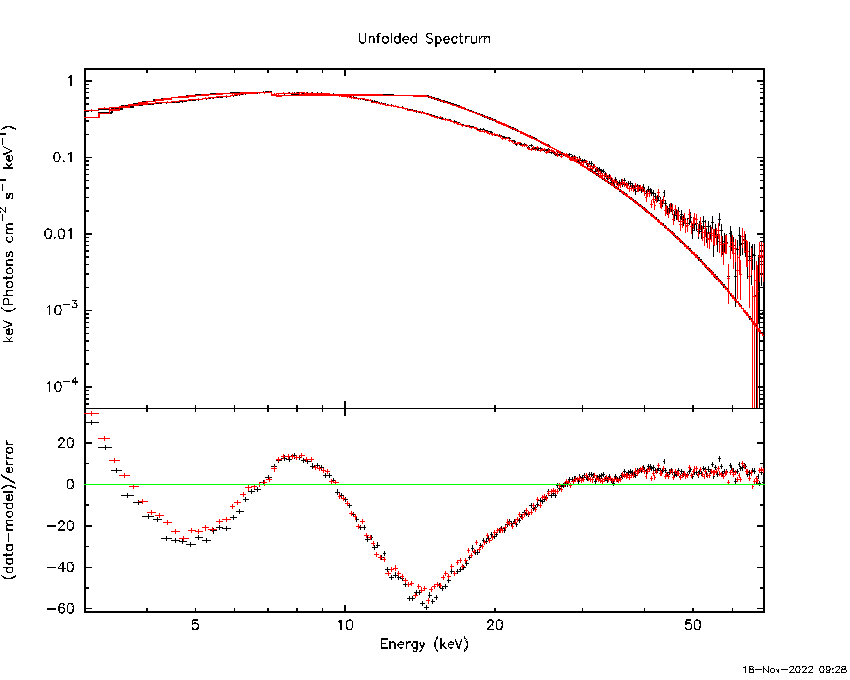

Fit Stat= 200225.78102028338 Chi2= 264406.6941073683 dof= 447

Spectral parameters:

	nH__01 11.69 10^22 (0.00-0.00)
	cutoffE__02 14.59 keV (0.00-0.00)
	foldE__03 7.97 keV (0.00-0.00)
	PhoIndex__04 1.25  (0.00-0.00)
	eMin 3 keV 
	eMax 14 keV 
	norm__07 13507.30  (0.00-0.00)
	nH 12 10^22 
	cutoffE 15 keV 
	foldE 8 keV 
	PhoIndex 1  
	eMin 3 keV 
	eMax 14 keV 
	norm__14 13422.10  (0.00-0.00)


In [6]:
import xspec
os.chdir('/home/jovyan/work/ap-lab-i-2022/data/')

#use the base model
mod_file = 'mod_base_4U.xcm'

#The following is an attempt to plot the model without the cyclotron lines
#mod_file = 'mod_3gabs_zero.xcm'



outputfiles_basename = 'GW-%s-' % (mod_file.replace('../mod_', '').replace('.xcm',''))

#'bxa-run-model.xcm'
pn_spec="FPMA_sr_rbn.pi"
mos1_spec="FPMB_sr_rbn.pi"
mos2_spec="none"
ignore_string=['**-3.0,70.0-**']*2
print("Using output file basename " + outputfiles_basename)


load_chain=False
compute_errors=False
perform_fit=False
save_xcm=False
run_chain=False

chain_name, fit_res =pysas.epic_xspec_mcmc_fit(xspec, mod_file, 
                                outputfiles_basename = outputfiles_basename,
                                pn_spec = pn_spec,
                                mos1_spec = mos1_spec,
                                mos2_spec =mos2_spec, 
                                jeffreys_priors=['norm', 'nH', 'cutoffE', 'foldE'],
                                               #jeffreys_priors=['norm', 'nH', 'T0', 'kT', 'taup'],
                                ignore_string=ignore_string,
                                load_chain=load_chain, perform_fit=perform_fit, set_priors=True, walkers=60, 
                                               run_chain=run_chain,
                                               compute_errors=compute_errors, save_xcm=save_xcm )


## We make a fit with a more complex model

Using output file basename GW-mod_2bw_final-
   All chains are now removed.
We load 2 spectra
['**-3.0,70.0-**', '**-3.0,70.0-**']

2 spectra  in use
 
Spectral Data File: FPMA_sr_rbn.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.789e+02 +/- 1.804e-01 (99.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-2461
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 8582 sec
 Using fit statistic: cstat
 Using Background File                FPMA_bk.pha
  Background Exposure Time: 8582 sec
 Using Response (RMF) File            FPMA_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  FPMA_sr.arf

Spectral Data File: FPMB_sr_rbn.pi  Spectrum 2
Net count rate (cts/s) for Spectrum:2  2.553e+02 +/- 1.697e-01 (99.9 % total)
 Assigned to Data Group 2 and Plot Group 2
  Noticed Channels:  1-2462
  Telescope: NuSTAR Instrument: FPMB  Channel Type: PI
  Exposure Time: 8880 sec
 Using fit statistic: cstat
 Using Background File               

PGPLOT /png: writing new file as GW-mod_2bw_final-euf_plot.png_2


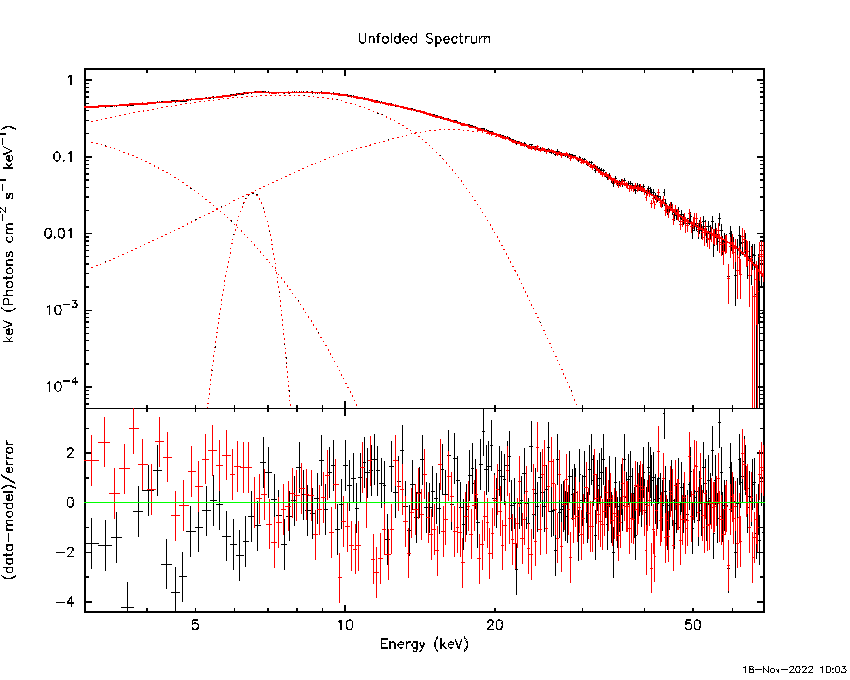

                                   Parameters
Fit Stat= 610.7074103875492 Chi2= 626.7682191675335 dof= 427

Spectral parameters:

	factor 1  
	nH 0.8 10^22 
	LineE__03 12 keV (12-12)
	Sigma__04 1 keV (1-1)
	Strength__05 0.3  (0.3-0.4)
	LineE__06 25 keV (25-25)
	Sigma__07 4 keV (4-5)
	Strength__08 7  (7-8)
	LineE__09 34 keV (34-34)
	Sigma__10 4 keV (4-4)
	Strength__11 5  (5-6)
	LineE__12 47 keV (46-47)
	Sigma__13 9 keV (9-9)
	Strength__14 23  (21-26)
	Radius 10 km 
	Mass 1 Solar 
	csi__17 0.7  (0.6-0.8)
	delta__18 1  (1-2)
	B 1 1e12G 
	Mdot 3 1e17g/s 
	Te__21 5 keV (5-5)
C-Statistic  |beta|/N    Lvl       3:LineE       4:Sigma    5:Strength       6:LineE       7:Sigma    8:Strength       9:LineE      10:Sigma   11:Strength      12:LineE      13:Sigma   14:Strength        17:csi      18:delta         21:Te         22:r0      28:LineE      29:Sigma       30:norm         31:kT       32:norm        35:csi      36:delta         39:Te         40:r0     46:factor
610.707      3.41661      -3  

In [7]:
import xspec

run_chain = True
reload(pysas)
fit_by_bin={}

chains=[]
#mod_file=outputfiles_basename+'model.xcm'
#mod_file='../model_cut.xcm'
    
mod_file = 'mod_2bw_final.xcm'


outputfiles_basename = 'GW-%s-' % (mod_file.replace('../mod_', '').replace('.xcm',''))

#'bxa-run-model.xcm'
pn_spec="FPMA_sr_rbn.pi"
mos1_spec="FPMB_sr_rbn.pi"
mos2_spec="none"
ignore_string=['**-3.0,70.0-**']*2
print("Using output file basename " + outputfiles_basename)


if run_chain:
    load_chain=False
    compute_errors=True
    perform_fit=True
    save_xcm=True
else:
    load_chain=True
    compute_errors=True
    perform_fit=False
    save_xcm=False
    
    
chain_name, fit_res =pysas.epic_xspec_mcmc_fit(xspec, mod_file, 
                                outputfiles_basename = outputfiles_basename,
                                pn_spec = pn_spec,
                                mos1_spec = mos1_spec,
                                mos2_spec =mos2_spec, 
                                jeffreys_priors=['norm', 'nH', 'cutoffE', 'foldE'],
                                               #jeffreys_priors=['norm', 'nH', 'T0', 'kT', 'taup'],
                                ignore_string=ignore_string,
                                load_chain=load_chain, perform_fit=perform_fit, set_priors=True, walkers=60, 
                                               run_chain=run_chain,
                                               compute_errors=compute_errors, save_xcm=save_xcm, 
                                               burn=8000, runLength=64000, )
chains.append(chain_name)


chain_commands='''

chain clear
chain type gw
chain walkers 60
chain burn 26000
chain length 36000

bayes on
bayes 1 jeffreys
bayes 8 jeffreys
bayes 9 jeffreys
bayes 12 jeffreys
bayes 16 jeffreys
bayes 32 jeffreys
query yes
fit

chain proposal gaussian diagonal 1e-1 1e-5 0.2 0.5 0.1 10. 10.
chain run %schain.fits

quit
yes

'''%outputfiles_basename


exposure, tstart, tstop = pysas.get_spec_exp_times("FPMA_sr_rbn.pi")

#    break

In [18]:
print(fit_res)

{'rate': [271.7266170155293, 271.5485609260712, 271.9046731049874], 'cstat': [610.7074103875492, 427], 'plot_filename': 'GW-mod_2bw_final-euf_plot.png', 'LineE__03': [11.869763327680888, 11.846908210233645, 11.911840936974679], 'Sigma__04': [1.1578126177509371, 1.1092486109904367, 1.231901681864588], 'Strength__05': [0.3332172299651569, 0.3227870719042032, 0.3664788123410941], 'LineE__06': [24.80298012255955, 24.70973413519944, 24.878985545247527], 'Sigma__07': [4.445218086271639, 4.368356280360688, 4.597802898356666], 'Strength__08': [7.258489547484286, 6.8852771312081975, 8.155297304560083], 'LineE__09': [34.366373997427786, 34.31093619843771, 34.47355202429904], 'Sigma__10': [3.6781711624266284, 3.60233128542822, 3.854763820604213], 'Strength__11': [5.4903738677678495, 5.09906223817723, 6.489013320680348], 'LineE__12': [46.527266548200174, 46.128595046797315, 47.430760789173355], 'Sigma__13': [9.129694641584244, 8.688053945266976, 9.468497683989309], 'Strength__14': [22.789700935005

In [17]:
models = [xspec.AllModels(j) for j in range(1, 2 + 1)]
models[0].gabs.LineE.values

[11.869763327680888, 0.11869763327680888, 0.0, 0.0, 1000000.0, 1000000.0]

In [14]:
#Set the number of spectra used
n_spec = 2

#Get the model's chi-squared
final_chi2 = xspec.Fit.testStatistic

def BIC_calc(chi2, n_spectra):
    '''
    Function to calculate the Bayesian Imformation Criterion (BIC)
    given the chi-squared for our model. 
    Parameters
    ----------
    :param chi2: float, chi-squared value to calcule the BIC for.
    Returns
    ----------
    BIC: float, BIC value.
    '''
 
    #Initialize the number of data points used
    n=0
    #Initialize the number of free parameters used 
    k=0
    
    #Summing the number of data points of each 
    #individual spectra
    for i in range(1, n_spectra+1):
        n += len(xspec.AllData(i).noticed)

    #Get the models for each spectra
    models = [xspec.AllModels(j) for j in range(1, n_spectra + 1)]

    #Make a function to get the number of free parameters
    def get_frozen(nn):
        '''
        Function to calculate the number of free parameters. 
        Parameters
        ----------
        :param nn: object, model for a spectra
        Returns
        ----------
        k: int, number of free parameters
        '''
        #Initializing k
        k=0
        #Iterating over the components of the model
        for i in nn.componentNames:
            #Iterating over the parameters of each component
            for j in getattr(nn,i).parameterNames:
                #If the parameters are frozen, the output is True
                #So we add to the sum when the output is False
                if not getattr(getattr(nn,i), j).frozen:
                    k+=1
        return k

    #Getting the total number of free parameters for all the spectra used
    for i in range(n_spectra):
        k+=get_frozen(models[i])
        
    #Return the BIC
    return chi2 + k*np.log(n)

models = [xspec.AllModels(j) for j in range(1, 2 + 1)]
BIC = BIC_calc(final_chi2, n_spec)
print('The chi-squared is:', final_chi2, 'and the BIC is:', BIC)

print('The cyclotron line energy is:', 0.5*(models[0].gabs_5.LineE.values[0]+models[1].gabs_5.LineE.values[0]),
      'keV with uncertainty:', 0.5*(models[0].gabs_5.Sigma.values[0]+models[1].gabs_5.Sigma.values[0]), 'keV')


446.4601251602615
The chi-squared is: 626.7682191675335 and the BIC is: 1073.228344327795
The cyclotron line energy is: 34.366373997427786 keV with uncertainty: 3.6781711624266284 keV


## This estimated the goodness of fit (it is long)

In [ ]:
if True:
   
    sorted_sampled_fit_statistics, best_fit_statistic, goodness = \
    pysas.goodness_from_chain(xspec, outputfiles_basename, n_sample=1000,
                            pn_spec=pn_spec,
                            mos1_spec=mos1_spec,
                            mos2_spec=mos2_spec,
                            ignore_string=ignore_string)
    ff=open(outputfiles_basename+'simul_test.txt','w')
    for x in sorted_sampled_fit_statistics:
        ff.write("%f\n" % x)
    ff.write("%f*\n" % best_fit_statistic)
    ff.close()
    os.chdir('..')
    plt.figure()
    plt.hist(sorted_sampled_fit_statistics, bins=20, label='Sample')
    plt.axvline(best_fit_statistic, color='red', label='Best fit')
    plt.xlabel('Test statistics')
    plt.ylabel('Simulations')
    plt.legend()
    

## Please edit the next cell to display parameters of your model

In [85]:
import pyxmmsas as pysas
latex_label_dict=pysas.default_latex_label_dict.copy()
latex_label_dict.update({ 
                        'nH__01': '$N_\\mathrm{H}$',
                        'nH__1': '$N_\\mathrm{H}$',                        
    'rate' : 'Cts/s',
    'cstat': '$\chi^2_\\mathrm{red}$/d.o.f.',
    
    'LineE__15': '$E_\\mathrm{Fe}$',
    'Sigma__16': '$\sigma_\\mathrm{Fe}$',
    'norm__17': '$N_\\mathrm{Fe}$',
    
    'LineE__2' : '$E_\\mathrm{Cyc1}$',
    'LineE__02' : '$E_\\mathrm{Cyc1}$',
    'Sigma__3' : '$\sigma_\\mathrm{Cyc1}$',
    'Sigma__03' : '$\sigma_\\mathrm{Cyc1}$',
    'Strength__4' : '$\\tau_\\mathrm{Cyc1}$',
    'Strength__04' : '$\\tau_\\mathrm{Cyc1}$',
    
    'LineE__5' : '$E_\\mathrm{Cyc2}$',
    'LineE__05' : '$E_\\mathrm{Cyc2}$',
    'Sigma__6' : '$\sigma_\\mathrm{Cyc2}$',
    'Sigma__06' : '$\sigma_\\mathrm{Cyc2}$',
    'Strength__7' : '$\\tau_\\mathrm{Cyc2}$',
    'Strength__07' : '$\\tau_\\mathrm{Cyc2}$',
    
    'LineE__8' : '$E_\\mathrm{Cyc3}$',
    'LineE__08' : '$E_\\mathrm{Cyc3}$',
    'Sigma__9' : '$\sigma_\\mathrm{Cyc3}$',
    'Sigma__09' : '$\sigma_\\mathrm{Cyc3}$',
    'Strength__10' : '$\\tau_\\mathrm{Cyc3}$',
    
    'cutoffE__11': '$E_\\mathrm{C}$',
    'foldE__12': '$E_\\mathrm{F}$',
    'kT__13': '$kT_\\mathrm{BB}$',
    'norm__14' : '$r^2_\\mathrm{BB}$',
        
     'norm__21': 'F [$10^{-12}$cgs]', #$_\mathrm{2-10 keV}$
    'norm__42': 'Flux (3-20 keV)',
    'PhoIndex__18': '$\\Gamma$',
})

In [63]:
import pyxmmsas as pysas
latex_label_dict=pysas.default_latex_label_dict.copy()
latex_label_dict.update({ 
    'nH__01': '$N_\\mathrm{H}$',
    'nH__1': '$N_\\mathrm{H}$',
    'nH__02': '$N_\\mathrm{H}$',
    'nH__2': '$N_\\mathrm{H}$',
    
    'CvrFract__03': 'Cov. Frac.',
    'CvrFract__3': 'Cov. Frac.',
    
    'rate' : 'Cts/s',
    'cstat': '$\chi^2_\\mathrm{red}$/d.o.f.',
    
    'LineE__04': '$E_\\mathrm{Cyc1}$',
    'LineE__4': '$E_\\mathrm{Cyc1}$',
    'Sigma__05' : '$\sigma_\\mathrm{Cyc1}$',
    'Sigma__5' : '$\sigma_\\mathrm{Cyc1}$',
    'Strength__06' : '$\\tau_\\mathrm{Cyc1}$',
    'Strength__6' : '$\\tau_\\mathrm{Cyc1}$',
    
    'LineE__07' : '$E_\\mathrm{Cutoff}$',
    'LineE__7' : '$E_\\mathrm{Cutoff}$',
    'Sigma__08' : '$\sigma_\\mathrm{Cutoff}$',
    'Sigma__8' : '$\sigma_\\mathrm{Cutoff}$',
    'Strength__09' : '$\\tau_\\mathrm{Cutoff}$',
    'Strength__9' : '$\\tau_\\mathrm{Cutoff}$',
    
    'cutoffE__10': '$E_\\mathrm{Cutoff}$',
    'foldE__11': '$E_\\mathrm{Cutoff}$',
    'LineE__12' : '$E_\\mathrm{Fe}$',
    'Sigma__13' : '$\sigma_\\mathrm{Fe}$',

    'PhoIndex__21': '$\\Gamma$',
    'norm__14' : 'F [$10^{-12}$cgs]',
    'norm__20' : 'F [$10^{-12}$cgs]',
    'norm__24' : 'F [$10^{-12}$cgs]', 
    'norm__48': 'Flux (3-20 keV)',
})

## Dump the latex table of parameters (you will need to make adjustements for the paper)

In [64]:
latex_table = pysas.dump_latex_table({'aal': fit_res}, latex_label_dict=latex_label_dict, 
                                        to_skip=['plot_filename','norm__18', 'times', 'rate'])
print(latex_table)


\begin{tabular}{lr@{}ll}

\hline

\hline
\multicolumn{4}{c}{aal}\\
\hline
$\chi^2_\mathrm{red}$/d.o.f. &  1.6 &/419 & \\
$N_\mathrm{H}$ & 2.6 &$_{-0.7}^{+0.6}$ & cm$^{-2}$ \\
$N_\mathrm{H}$ & 40 &$\pm$3 & cm$^{-2}$\\
Cov. Frac. & 0.55 &$\pm$0.02 & \\
$E_\mathrm{Cyc1}$ & 29.73 &$_{-0.15}^{+0.20}$ & keV \\
$\sigma_\mathrm{Cyc1}$ & 5.32 &$_{-0.16}^{+0.19}$ &  \\
$\tau_\mathrm{Cyc1}$ & 6.6 &$_{-0.3}^{+0.4}$ &  \\
$E_\mathrm{Cutoff}$ & 14.50 &$_{-0.06}^{+0.08}$ & keV \\
$\sigma_\mathrm{Cutoff}$ & 0.66 &$_{-0.04}^{+0.06}$ &  \\
$\tau_\mathrm{Cutoff}$ & 0.122 &$_{-0.009}^{+0.012}$ &  \\
$E_\mathrm{Cutoff}$ & 14.42 &$\pm$0.06 & keV\\
$E_\mathrm{Cutoff}$ & 9.81 &$\pm$0.09 & keV\\
$E_\mathrm{Fe}$ & 6.356 &$\pm$0.008 & keV\\
$\sigma_\mathrm{Fe}$ & 0.179 &$_{-0.016}^{+0.020}$ &  \\
F [$10^{-12}$cgs] & 3.03e-03 &$_{-1.32e-04}^{+1.91e-04}$ &  \\
F [$10^{-12}$cgs] & 5.7e-04 &$\pm$5.9e-05 & \\
$\Gamma$ & 1.325 &$_{-0.023}^{+0.018}$ &  \\
F [$10^{-12}$cgs] & 1.368e+04 &$_{-1.013e+02}^{+1.496e+02}$ &  

## Plot the chain and the corner plot

In [65]:
#reload(pysas)
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy.table import Table
import corner
import xspec
from glob import glob
from matplotlib import rc
#fit_by_bin = {}

plot_chains=True
plot_corners=True

#Find the proper file
chains=sorted(glob('GW-mod_pcfabs_2gauss_2gabs-chain.fits'))
#print(chains)
print(chain_name.replace('.fits',''))

#chains=sorted(glob('GW-pcfabs-chain.fits'))
rc('text', usetex=False)

for i,chain_name in enumerate(chains):

    if i > 5:
        continue
    
    print(chain_name)
    
    table_chain=Table.read(chain_name)
    chain_df=table_chain.to_pandas()
    if plot_chains:
        for kk in table_chain.keys():
            if kk != 'FIT_STATISTIC':
                continue
            ff=plt.figure()
            plt.plot(table_chain[kk], 'o')
            plt.savefig('test_plot.pdf')
            ax=ff.gca()
            ax.set_ylabel(kk)
    
    
    chain_par_names=table_chain.keys()
    
    to_drop=['FIT_STATISTIC']
    
    for kk in chain_par_names:
        if 'factor' in kk:
            to_drop.append(kk)
    
    for kk in to_drop:
        chain_df.drop(kk, 1,  inplace=True)
    
    labels=[latex_label_dict[kk] for kk in list(chain_df.columns) ]
    
    rc('text', usetex=False)
    if plot_corners:
        corner_plot=corner.corner(chain_df, bins=20, labels=labels, quantiles=[0.16,0.84],
                                  plot_datapoints=False)
        corner_plot.savefig(chain_name.replace('.fits','')+'_corner_%02d.pdf'%(i+1))
    rc('text', usetex=False)
    
    
    quantiles=chain_df.quantile([0.16,0.5,0.84],axis=0)
    print(quantiles)
    if i>3:
        break


GW-mod_pcfabs_2gauss_2gabs-chain
GW-mod_pcfabs_2gauss_2gabs-chain.fits
 WARNING - UnitsWarning: 'C-Statistic' did not parse as fits unit: Invalid character at col 1 If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html


<IPython.core.display.Javascript object>

/tmp/ipykernel_645/1133947828.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  chain_df.drop(kk, 1,  inplace=True)


<IPython.core.display.Javascript object>

         nH__1      nH__2  CvrFract__3   LineE__4  Sigma__5  Strength__6  \
0.16  1.935826  37.769688     0.526454  29.572749  5.154246     6.302984   
0.50  2.611405  40.360034     0.549757  29.743507  5.328753     6.632777   
0.84  3.235711  43.018706     0.573069  29.919970  5.508186     7.001966   

       LineE__7  Sigma__8  Strength__9  cutoffE__10  foldE__11  LineE__12  \
0.16  14.438134  0.614285     0.112358    14.354241   9.717366   6.348451   
0.50  14.506104  0.667934     0.122418    14.413769   9.803562   6.356470   
0.84  14.577579  0.720388     0.133546    14.482231   9.891040   6.364824   

      Sigma__13  norm__14  norm__20  PhoIndex__21      norm__24      norm__48  
0.16   0.163083  0.002899  0.000518      1.302836  13582.884225  13490.737743  
0.50   0.180862  0.003048  0.000578      1.323537  13701.649525  13612.906840  
0.84   0.198874  0.003221  0.000636      1.342929  13831.983016  13741.271015  


## Here we test another model...

In [66]:
xspec.AllModels.lmod("bwmod", "/home/jovyan/work/ap-lab-i-2022/xspec_lmod/")

Model package bwmod successfully loaded.


Using output file basename GW-mod_newhcut_4gaus_1gabs-
We load 2 spectra
['**-3.0,70.0-**', '**-3.0,70.0-**']

***Warning: The file sent to Xset.restore(): mod_newhcut_4gaus_1gabs.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


   All chains are now removed.

*** Background file has inconsistent format with data:  background file FPMA_bk.pha read skipped

*** Background file has inconsistent format with data:  background file FPMB_bk.pha read skipped

2 spectra  in use
 
Spectral Data File: FPMA_sr_rbn.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.473e+01 +/- 5.496e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-2440
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 2.143e+04 sec
 Using fit statistic: cstat
 Using Response (RMF) File            FPMA_sr.rmf for Source 1
 Using Auxiliary 

*** Check for missing or improperly set HDUCLASS keywords in HDU of spectrum file
    (or PHAVERSN keyword for old-style files).
*** Check for missing or improperly set HDUCLASS keywords in HDU of spectrum file
    (or PHAVERSN keyword for old-style files).


GW-mod_newhcut_4gaus_1gabs-chain.fitsnot fit yet.

Fit statistic  : C-Statistic                  392.61     using 217 bins.
                 C-Statistic                  396.94     using 220 bins.
Total fit statistic                           772.35     with 421 d.o.f.
   (Includes a Bayesian contribution of -8.60)

Test statistic : Chi-Squared                  608.17     using 437 bins.
 Null hypothesis probability of 5.75e-09 with 421 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                  392.61     using 217 bins.
                 C-Statistic                  396.94     using 220 bins.
Total fit statistic                           744.72     with 421 d.o.f.
   (Includes a Bayesian contribution of -22.42)

Test statistic : Chi-Squared                  608.17     using 437 bins.
 Null hypothesis probability of 5.75e-09 with 421 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                  392.61  

PGPLOT /png: writing new file as GW-mod_newhcut_4gaus_1gabs-euf_plot.png_2


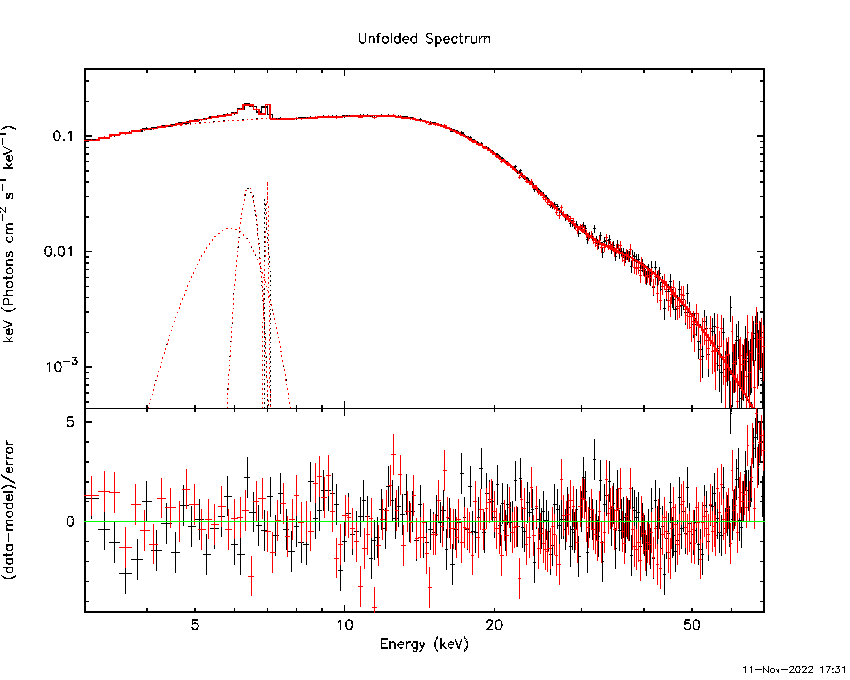

 
   7    3   newhcut    Width      keV      6.52495      +/-  0.249800     
   8    4   gaussian   LineE      keV      6.40400      frozen
   9    4   gaussian   Sigma      keV      0.200346     +/-  1.40829E-02  
  10    4   gaussian   norm                3.15198E-03  +/-  2.05515E-04  
  11    5   gaussian   LineE      keV      6.67000      frozen
  12    5   gaussian   Sigma      keV      5.00000E-03  frozen
  13    5   gaussian   norm                0.0          frozen
  14    6   gaussian   LineE      keV      6.97000      frozen
  15    6   gaussian   Sigma      keV      3.00000E-02  frozen
  16    6   gaussian   norm                1.01179E-03  +/-  8.14654E-05  
  17    7   gaussian   LineE      keV      5.79300      +/-  4.87615E-02  
  18    7   gaussian   Sigma      keV      0.709010     +/-  4.57627E-02  
  19    7   gaussian   norm                5.23390E-03  +/-  5.13934E-04  
  20    8   pegpwrlw   PhoIndex            0.897214     +/-  1.46878E-02  
  21    8   pegpwrlw

In [67]:
import xspec

run_chain = True
reload(pysas)
fit_by_bin={}

chains=[]
#mod_file=outputfiles_basename+'model.xcm'
#mod_file='../model_cut.xcm'
    
mod_file = 'mod_newhcut_4gaus_1gabs.xcm'


outputfiles_basename = 'GW-%s-' % (mod_file.replace('../mod_', '').replace('.xcm',''))

#'bxa-run-model.xcm'
pn_spec="FPMA_sr_rbn.pi"
mos1_spec="FPMB_sr_rbn.pi"
mos2_spec="none"
ignore_string=['**-3.0,70.0-**']*2
print("Using output file basename " + outputfiles_basename)


if run_chain:
    load_chain=False
    compute_errors=True
    perform_fit=True
    save_xcm=True
else:
    load_chain=True
    compute_errors=True
    perform_fit=False
    save_xcm=False
    
    
chain_name, fit_res =pysas.epic_xspec_mcmc_fit(xspec, mod_file, 
                                outputfiles_basename = outputfiles_basename,
                                pn_spec = pn_spec,
                                mos1_spec = mos1_spec,
                                mos2_spec =mos2_spec, 
                                jeffreys_priors=['norm', 'nH', 'cutoffE', 'foldE'],
                                               #jeffreys_priors=['norm', 'nH', 'T0', 'kT', 'taup'],
                                ignore_string=ignore_string,
                                load_chain=load_chain, perform_fit=perform_fit, set_priors=True, walkers=60, 
                                               run_chain=run_chain,
                                               compute_errors=compute_errors, save_xcm=save_xcm, 
                                               burn=8000, runLength=64000, )
chains.append(chain_name)


chain_commands='''

chain clear
chain type gw
chain walkers 60
chain burn 26000
chain length 36000

bayes on
bayes 1 jeffreys
bayes 8 jeffreys
bayes 9 jeffreys
bayes 12 jeffreys
bayes 16 jeffreys
bayes 32 jeffreys
query yes
fit

chain proposal gaussian diagonal 1e-1 1e-5 0.2 0.5 0.1 10. 10.
chain run %schain.fits

quit
yes

'''%outputfiles_basename


exposure, tstart, tstop = pysas.get_spec_exp_times("FPMA_sr_rbn.pi")



#break

In [68]:
#Set the number of spectra used
n_spec = 2

#Get the model's chi-squared
new_final_chi2 = xspec.Fit.testStatistic

#Get the BIC
new_BIC = BIC_calc(new_final_chi2, n_spec)
print(final_chi2, BIC)
print(new_final_chi2, new_BIC)

569.193763496547 806.311158105275
598.591898865672 817.4694938891132


In [75]:
new_models = [xspec.AllModels(j) for j in range(1, 2 + 1)]

print('The chi-squared is:', new_final_chi2, 'and the BIC is:', new_BIC)
print('The cyclotron line energy is:', 
      0.5*(new_models[0].gabs.LineE.values[0]+new_models[1].gabs.LineE.values[0]),
      ' keV with uncertainty:', 
      0.5*(new_models[0].gabs.Sigma.values[0]+new_models[1].gabs.Sigma.values[0]), 'keV')

The chi-squared is: 598.591898865672 and the BIC is: 817.4694938891132
The cyclotron line energy is: 29.98651855405053  keV with uncertainty: 5.985235028418713 keV
